In [4]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv('aggregated_hemnet.csv').drop('Unnamed: 0', axis=1)
df = df.drop('index', axis=1)

In [6]:
df.columns = ['date', 'area', 'price_sqm', 'asking_price', 'nbr_rooms',
       'living_space', 'rent', 'additional', 'year_built', 'closing_price',
       'bi_area', 'price_inc_percent']

In [7]:
df.corr()['price_sqm']

price_sqm            1.000000
asking_price         0.169107
nbr_rooms           -0.180821
living_space        -0.165208
rent                -0.358677
additional          -0.075175
year_built          -0.100974
closing_price        0.213573
bi_area              0.075368
price_inc_percent    0.346521
Name: price_sqm, dtype: float64

In [8]:
df.date = pd.to_datetime(df.date)
num_dt = pd.to_numeric(df.date)
num_dt = (num_dt - num_dt.min())/(num_dt.max() - num_dt.min())
df['time'] = num_dt
df.loc[df.bi_area.isna(), 'bi_area'] = 0
df.loc[df.additional.isna(), 'additional'] = 0
df = df.loc[~df.rent.isna()]
df = df.loc[~df.year_built.isna()]
df = df.loc[(df.year_built != 0) & (df.year_built != 189.0)]
df = df.loc[~df.living_space.isna()]
df = df.loc[~df.nbr_rooms.isna()]
df = df.reset_index(drop=True)

In [11]:
df1 = df.drop('date', axis=1)

In [218]:
df1

,area,price_sqm,asking_price,nbr_rooms,living_space,rent,additional,year_built,closing_price,bi_area,price_inc_percent,time
0,sodermalm,102500.0,3495000.0,1.0,40.0,1160.0,9500.0,1889.0,4100000,0.0,0.173104,1.000000
1,kungsholmen,107955.0,1995000.0,1.0,22.0,1581.0,2800.0,1937.0,2375000,0.0,0.190476,1.000000
2,vasastan,108500.0,4495000.0,2.0,50.0,550.0,3600.0,1912.0,5425000,0.0,0.206897,0.999608
3,kungsholmen,103704.0,2800000.0,1.0,27.0,790.0,4164.0,1937.0,2800000,0.0,0.000000,0.999608
4,lilla_essingen,62202.0,4995000.0,3.0,84.0,3689.0,5500.0,1939.0,5225000,0.0,0.046046,0.999608
...,...,...,...,...,...,...,...,...,...,...,...,...
13441,lilla_essingen,57750.0,2195000.0,2.0,40.0,2464.0,0.0,1938.0,2310000,0.0,0.052392,0.021143
13442,lilla_essingen,50357.0,2195000.0,1.5,42.0,2436.0,6680.0,1936.0,2115000,0.0,-0.036446,0.019969
13443,stora_essingen,44940.0,3700000.0,2.5,84.0,3732.0,9616.0,1935.0,3775000,0.0,0.020270,0.014879
13444,lilla_essingen,47500.0,1950000.0,1.5,40.0,2269.0,3400.0,1939.0,1900000,0.0,-0.025641,0.012529


In [123]:
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor

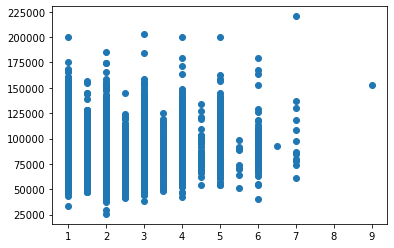

In [161]:
plt.scatter(df.nbr_rooms, df.price_sqm)

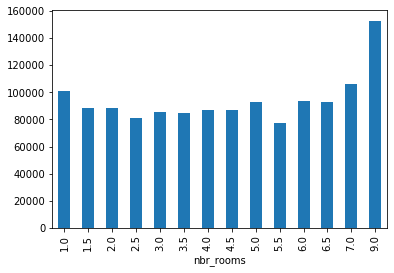

In [163]:
df.groupby('nbr_rooms')['price_sqm'].mean().plot.bar()

In [292]:
X = pd.get_dummies(df[['price_sqm', 'living_space', 'rent', 'bi_area', 'time', 'nbr_rooms', 'additional', 'area']])

In [293]:
df

,date,area,price_sqm,asking_price,nbr_rooms,living_space,rent,additional,year_built,closing_price,bi_area,price_inc_percent,time,outlier
0,2019-12-21,sodermalm,102500.0,3495000.0,1.0,40.0,1160.0,9500.0,1889.0,4100000,0.0,0.173104,1.000000,1
1,2019-12-21,kungsholmen,107955.0,1995000.0,1.0,22.0,1581.0,2800.0,1937.0,2375000,0.0,0.190476,1.000000,1
2,2019-12-20,vasastan,108500.0,4495000.0,2.0,50.0,550.0,3600.0,1912.0,5425000,0.0,0.206897,0.999608,1
3,2019-12-20,kungsholmen,103704.0,2800000.0,1.0,27.0,790.0,4164.0,1937.0,2800000,0.0,0.000000,0.999608,1
4,2019-12-20,lilla_essingen,62202.0,4995000.0,3.0,84.0,3689.0,5500.0,1939.0,5225000,0.0,0.046046,0.999608,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13441,2013-02-15,lilla_essingen,57750.0,2195000.0,2.0,40.0,2464.0,0.0,1938.0,2310000,0.0,0.052392,0.021143,1
13442,2013-02-12,lilla_essingen,50357.0,2195000.0,1.5,42.0,2436.0,6680.0,1936.0,2115000,0.0,-0.036446,0.019969,1
13443,2013-01-30,stora_essingen,44940.0,3700000.0,2.5,84.0,3732.0,9616.0,1935.0,3775000,0.0,0.020270,0.014879,1
13444,2013-01-24,lilla_essingen,47500.0,1950000.0,1.5,40.0,2269.0,3400.0,1939.0,1900000,0.0,-0.025641,0.012529,1


In [294]:
#X = df[['living_space', 'price_sqm']]

In [295]:
model = IsolationForest(random_state=42,
                        max_features=X.shape[1],
                        n_estimators=1000,
                        contamination=.05)
model.fit(X)

IsolationForest(behaviour='deprecated', bootstrap=False, contamination=0.05,
                max_features=15, max_samples='auto', n_estimators=1000,
                n_jobs=None, random_state=42, verbose=0, warm_start=False)

In [296]:
colors = model.decision_function(X)
colors = (colors - colors.min())/(colors.max() - colors.min())

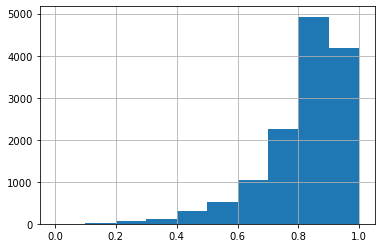

In [297]:
pd.Series(colors).hist()

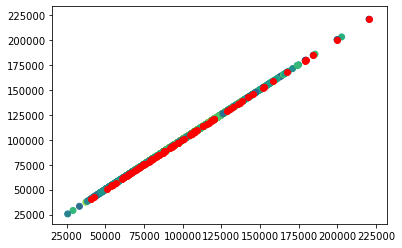

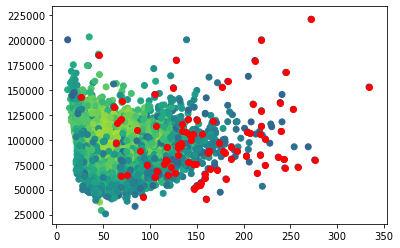

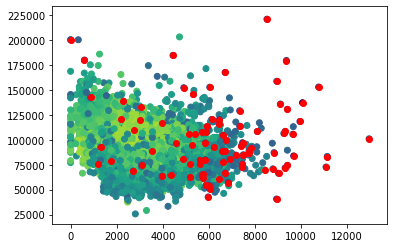

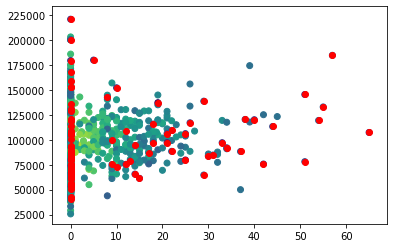

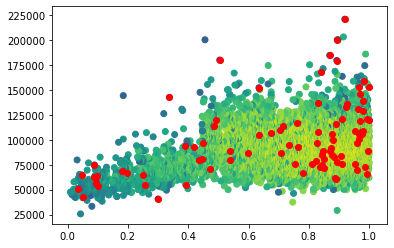

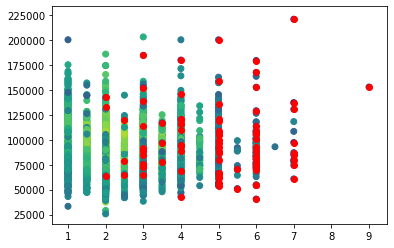

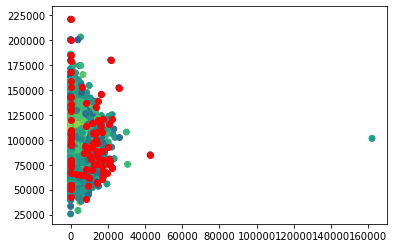

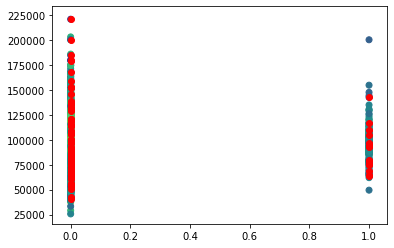

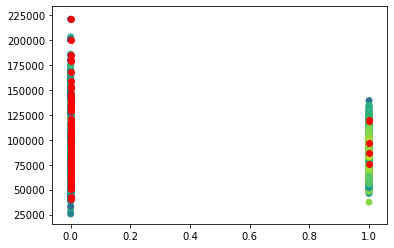

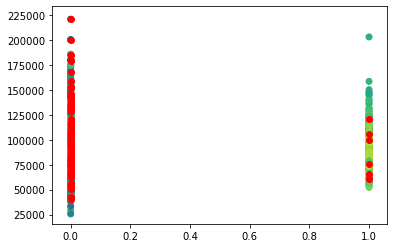

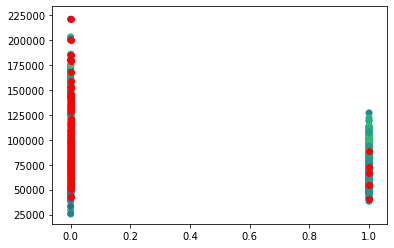

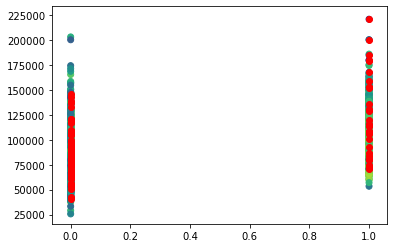

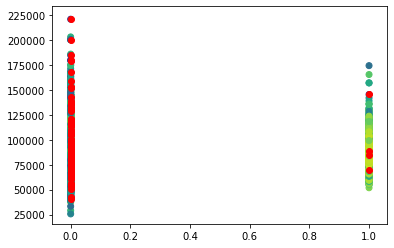

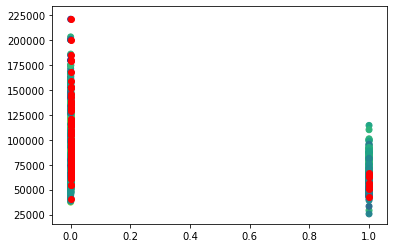

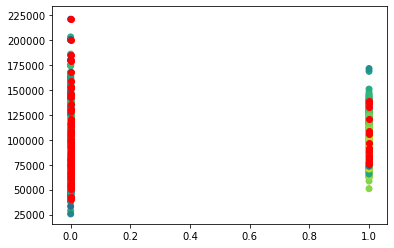

In [298]:
for col in X.columns:
    plt.scatter(X[col], X.price_sqm, c=colors)
    plt.scatter(X.loc[colors<0.3][col], X.loc[colors<.3].price_sqm, c='r')
    plt.show()

In [301]:
df.loc[colors < 0.3].groupby('area').price_sqm.mean()

area
gamla_stan         90426.400000
gardet             99479.200000
kungsholmen        84124.428571
lilla_essingen     62872.166667
ostermalm         123562.250000
sodermalm          96948.250000
stora_essingen     56956.714286
vasastan          100691.933333
Name: price_sqm, dtype: float64

In [309]:
df.loc[colors < 0.3].sort_values('price_sqm').head(60)

,date,area,price_sqm,asking_price,nbr_rooms,living_space,rent,additional,year_built,closing_price,bi_area,price_inc_percent,time,outlier
13033,2015-01-29,lilla_essingen,40625.0,6400000.0,6.0,160.0,8933.0,8393.0,1939.0,6500000,0.0,0.015625,0.300313,-1
13413,2013-05-02,stora_essingen,42742.0,3995000.0,4.0,93.0,5966.0,0.0,1998.0,3975000,0.0,-0.005006,0.050901,1
13432,2013-03-19,stora_essingen,51020.0,7500000.0,5.5,147.0,6031.0,0.0,1932.0,7500000,0.0,0.000000,0.033673,1
13358,2013-09-05,stora_essingen,54000.0,8100000.0,5.0,150.0,6004.0,9540.0,1939.0,8100000,0.0,0.000000,0.100235,1
13106,2014-10-14,lilla_essingen,54248.0,8000000.0,6.0,153.0,5890.0,0.0,1939.0,8300000,0.0,0.037500,0.258418,1
12868,2015-09-21,lilla_essingen,54902.0,8295000.0,6.0,153.0,5890.0,0.0,1939.0,8400000,0.0,0.012658,0.392326,1
13371,2013-08-23,stora_essingen,56958.0,8900000.0,5.0,154.5,6847.0,14256.0,2009.0,8800000,0.0,-0.011236,0.095145,-1
5852,2019-03-15,kungsholmen,60773.0,11950000.0,7.0,181.0,6435.0,16800.0,2015.0,11000000,0.0,-0.079498,0.889977,-1
6150,2019-03-04,kungsholmen,61356.0,9995000.0,5.0,158.5,5751.0,9840.0,2015.0,9725000,15.0,-0.027014,0.885670,-1
13376,2013-08-08,stora_essingen,62381.0,6550000.0,5.0,105.0,5191.0,9476.0,1938.0,6550000,0.0,0.000000,0.089272,1


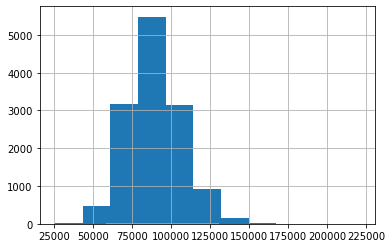

In [306]:
df.loc[colors >= 0.3].price_sqm.hist()
df.loc[colors < 0.3].price_sqm.hist()

In [302]:
df.loc[colors >= 0.3].groupby('area').price_sqm.mean()

area
gamla_stan         97700.503817
gardet             85201.652429
kungsholmen        86544.647110
lilla_essingen     74644.264065
ostermalm         105618.966146
sodermalm          86905.678763
stora_essingen     67842.730129
vasastan           95555.962224
Name: price_sqm, dtype: float64

In [281]:
iso_for = model.decision_function(X)

In [282]:
df['dec'] = pd.Series(iso_for)

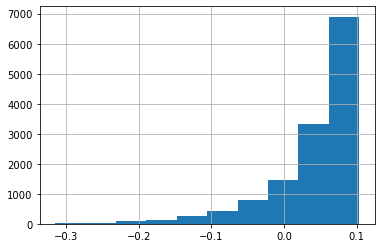

In [283]:
df.dec.hist()

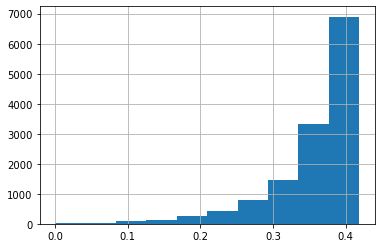

In [284]:
(df.dec+abs(df.dec.min())).hist()

In [285]:
from sklearn.preprocessing import StandardScaler, PowerTransformer
scaler = PowerTransformer(method='box-cox', standardize=False)
y_scaled = pd.DataFrame(scaler.fit_transform((df.dec+abs(df.dec.min())+0.001).values.reshape(-1,1)))
y_scaled.columns = ['dec']

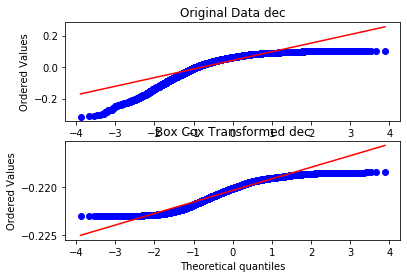

In [286]:
from scipy import stats
import matplotlib.pyplot as plt
for c in y_scaled.columns:
    fig = plt.figure()
    ax1 = fig.add_subplot(211)
    x = df[c]
    prob = stats.probplot(x, dist=stats.norm, plot=ax1)
    ax1.set_xlabel('')
    ax1.set_title('Original Data {}'.format(c))
    ax2 = fig.add_subplot(212)
    xt = y_scaled[c]
    prob = stats.probplot(xt, dist=stats.norm, plot=ax2)
    ax2.set_title('Box Cox Transformed {}'.format(c))
    plt.show()

In [287]:
cutoff = -0.1
df.loc[df.dec < cutoff, 'outlier'] = 1
df.loc[df.dec >= cutoff, 'outlier'] = 0

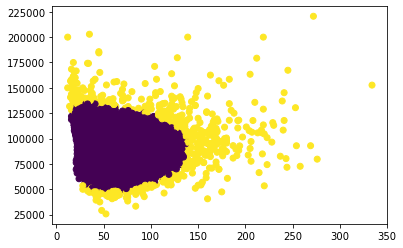

In [288]:
plt.scatter(df.living_space, df.price_sqm, c=df.outlier)

In [289]:
df.outlier.value_counts()

0.0    12873
1.0      573
Name: outlier, dtype: int64

In [152]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df1, 
                                                   df.outlier,
                                                   test_size=.3,
                                                   random_state=42,
                                                   stratify=df.outlier)

AttributeError: 'DataFrame' object has no attribute 'outlier'

In [238]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(max_iter=1000)
clf.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [239]:
from sklearn.metrics import classification_report
print(classification_report(y_test, clf.predict(X_test)))

              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99      3948
         1.0       0.84      0.24      0.38        86

    accuracy                           0.98      4034
   macro avg       0.91      0.62      0.68      4034
weighted avg       0.98      0.98      0.98      4034



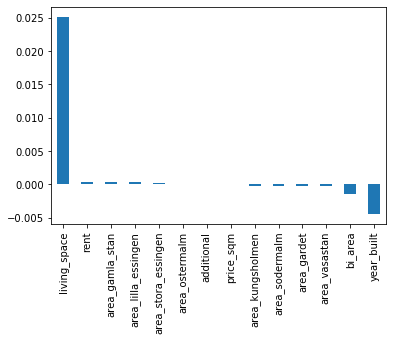

In [240]:
coef = pd.Series(clf.coef_[0])
coef.index = df1.columns
coef.sort_values(ascending=False).plot.bar()